In [1]:
import pickle
import pandas as pd

In [3]:
tickers = ['btc', 'eth', 'xrp', 'usdt', 'ltc', 'xlm', 'xem', 'xmr', 'dash', 'dcr', 'zec', 'etc', 'waves', 'dgb', 'sc']

temp_dir = {'SYMBOL' : [],
            'INDUSTRIES' : [],
            'RETURN' : [],
            'MARKET RETURN': [],
            'SCORE' : []}


for ticker in tickers:
    with open(f'score/{ticker.upper()}-USD.pkl', 'rb') as f:
        rank = pickle.load(f)
        df = pd.read_csv(f'../data/{ticker.upper()}-USD.csv')['stock_price']
        ret = ((df.iloc[-1] - df.iloc[0])/df.iloc[0]) * 100
        
        temp_dir['SYMBOL'].append(rank[0])
        temp_dir['INDUSTRIES'].append(rank[1])
        temp_dir['RETURN'].append(rank[3])
        temp_dir['MARKET RETURN'].append(ret)
        temp_dir['SCORE'].append(rank[2])

            
ranking = pd.DataFrame(temp_dir)
ranking = ranking.sort_values('SCORE', ascending=False)
ranking['RANK'] = [i for i in range(1, len(ranking) + 1)]
ranking.set_index('RANK', inplace=True)
ranking

,SYMBOL,INDUSTRIES,RETURN,MARKET RETURN,SCORE
RANK,,,,,
1,XMR-USD,Cryptocurrency,8.505386,-13.486950,2.949703
2,LTC-USD,Cryptocurrency,6.769413,-14.508253,2.775442
3,ETC-USD,Cryptocurrency,5.698657,-18.721677,2.751601
4,DASH-USD,Cryptocurrency,0.199509,-29.677535,2.655630
5,XEM-USD,Cryptocurrency,8.138921,-25.210046,2.413011
6,XRP-USD,Cryptocurrency,14.659137,8.835098,2.399669
7,ZEC-USD,Cryptocurrency,4.929192,-12.922420,2.147704
8,WAVES-USD,Cryptocurrency,5.413195,-11.651053,1.957759
9,ETH-USD,Cryptocurrency,5.576771,-9.002396,1.945537


<AxesSubplot:xlabel='SYMBOL'>

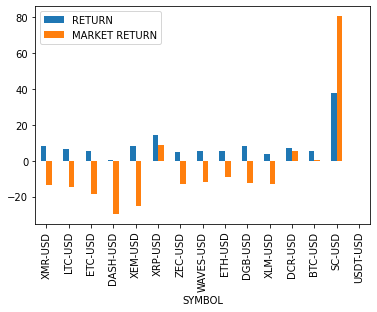

In [4]:
ranking.groupby('SYMBOL').mean().sort_values(by='SCORE', ascending=False).drop('SCORE', axis=1).plot.bar()